In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from HiggsR2_time import Background
from Potential import Potential_function
plt.style.use('style')
from pathlib import Path

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 0.1, 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
#Extrayendo datos de la clase background
bg = Background(potential, trayectory = 3, lambda_h= 1e-10, xi = 0.1, xi_s = 4e8)

In [5]:
h0 = np.sqrt(0.1*(np.exp(np.sqrt(2/3*5.7) -1)/(0.1**2 + 4*1e-10*4e8)))
h0

np.float64(1.2328953039636625)

In [6]:
vars = ['t', 'N', 'phi', 'y', 'h', 'z', 'H', 'a',  'aH', 'eps_H', 'dot_sigma', 'eta_perp', 'm_iso']
t, N, phi, y, h, z, H, a, aH, eps_H, dot_sigma, eta_perp, m_iso = (bg.data[i] for i in vars)
Nend = bg.N_end
Nend

/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Code/Higgs-R^2/HiggsR2_time.py:47: RuntimeWarning: invalid value encountered in divide
  return np.exp(0.5*self.alpha*phi)*(y*dVdh - np.exp(-self.alpha*phi)*z*dVdphi)/(H*dot_sigma**2)
/Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Code/Higgs-R^2/HiggsR2_time.py:59: RuntimeWarning: invalid value encountered in divide
  return (np.exp(self.alpha*phi)*y**2*d2Vdh2 + np.exp(-self.alpha*phi)*z**2*d2Vdphi2 - 2*y*z*d2Vdphih - 0.5*self.alpha*(y**2*dVdphi + 2*y*z*dVdh))/(dot_sigma**2)


np.float64(76.15484599203096)

/Users/flaviopineda/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


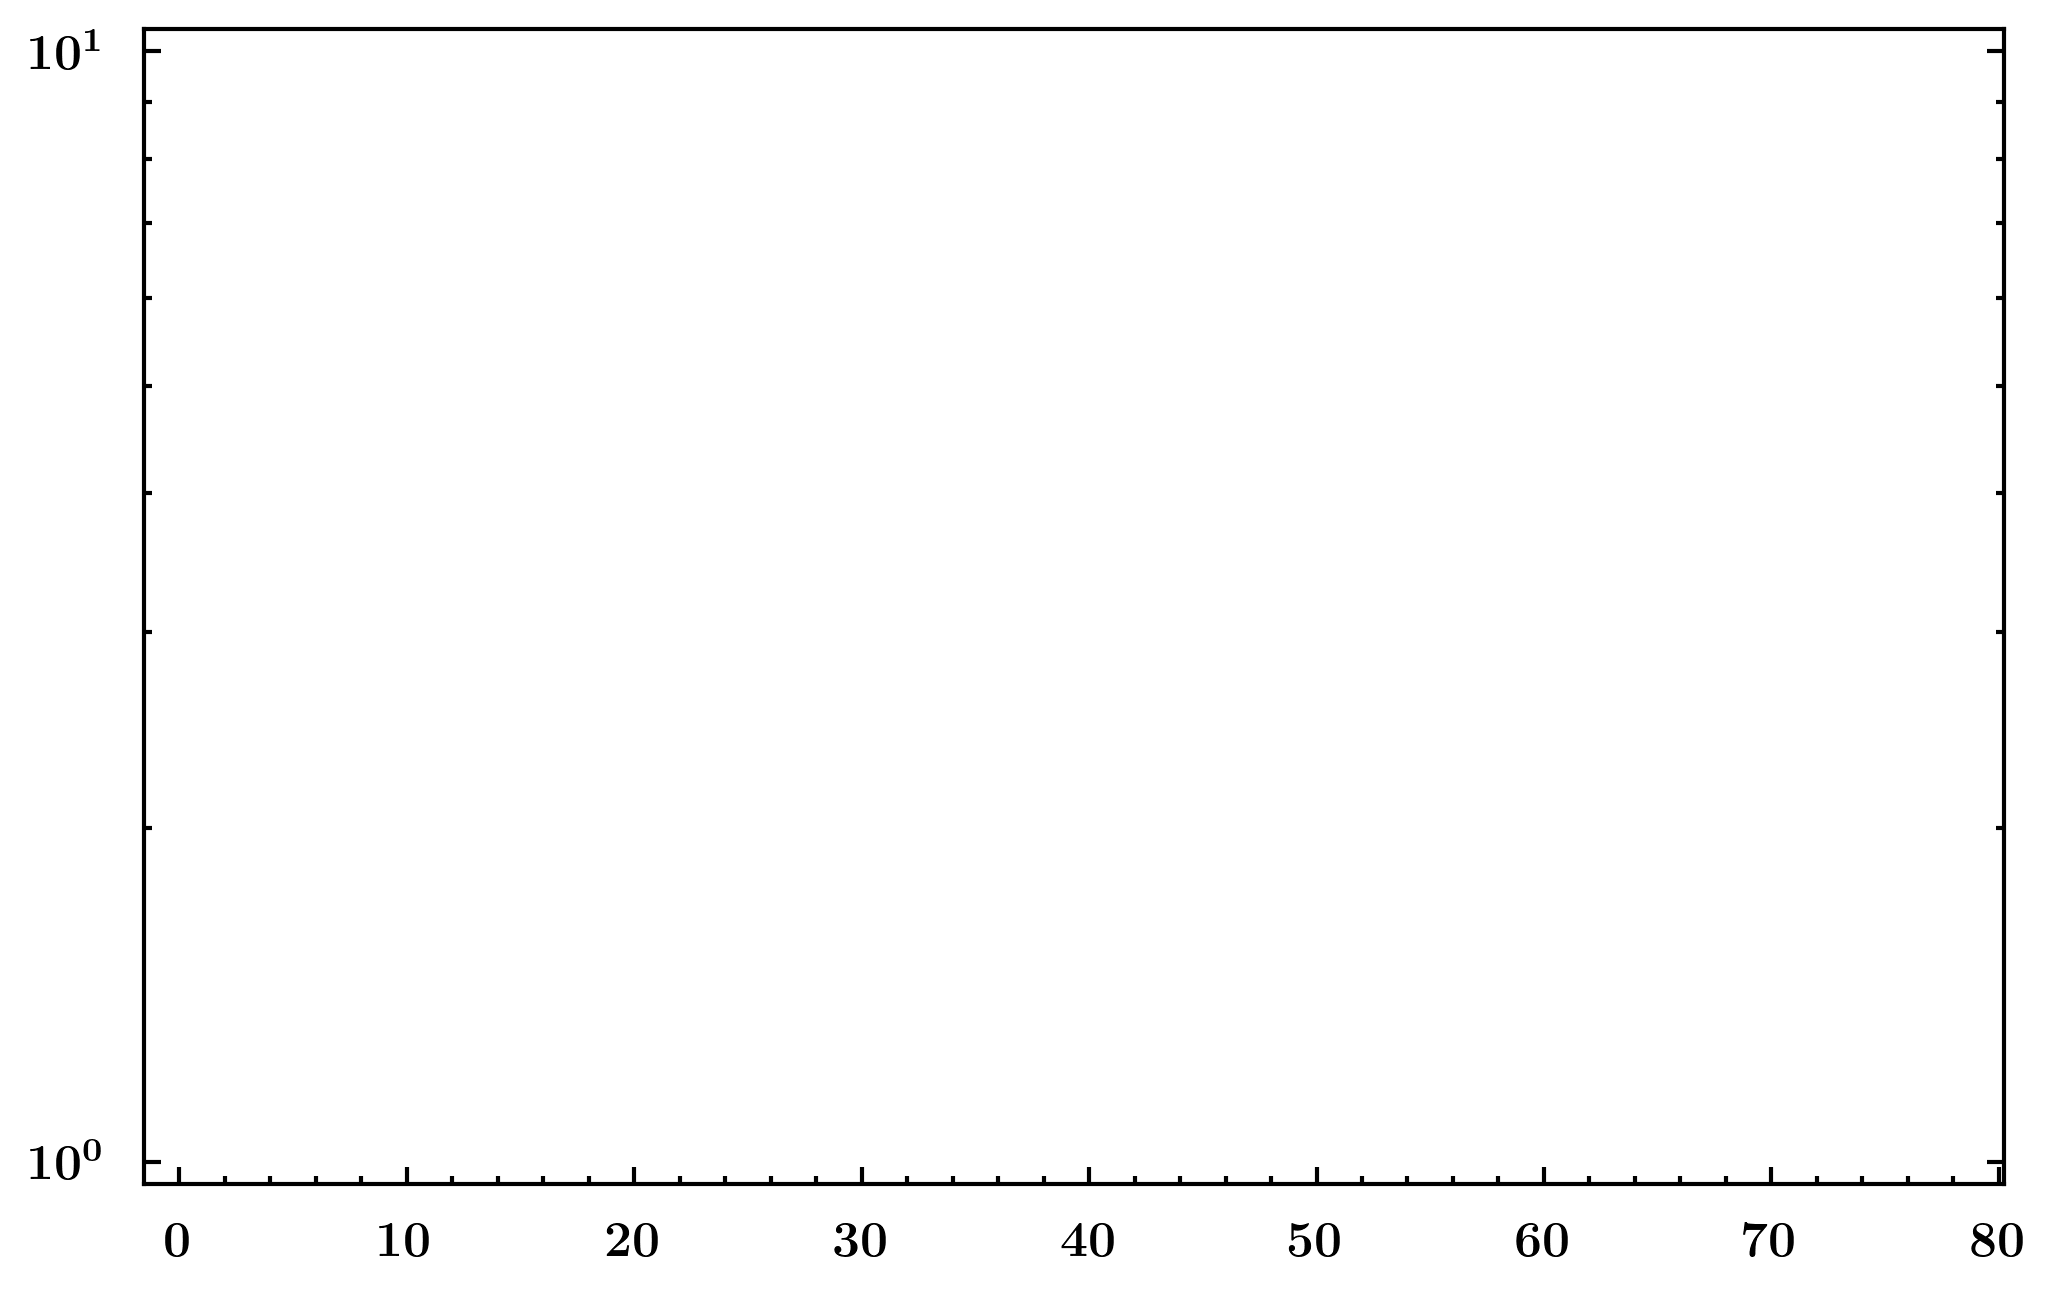

In [7]:
plt.semilogy(N, abs(eta_perp))

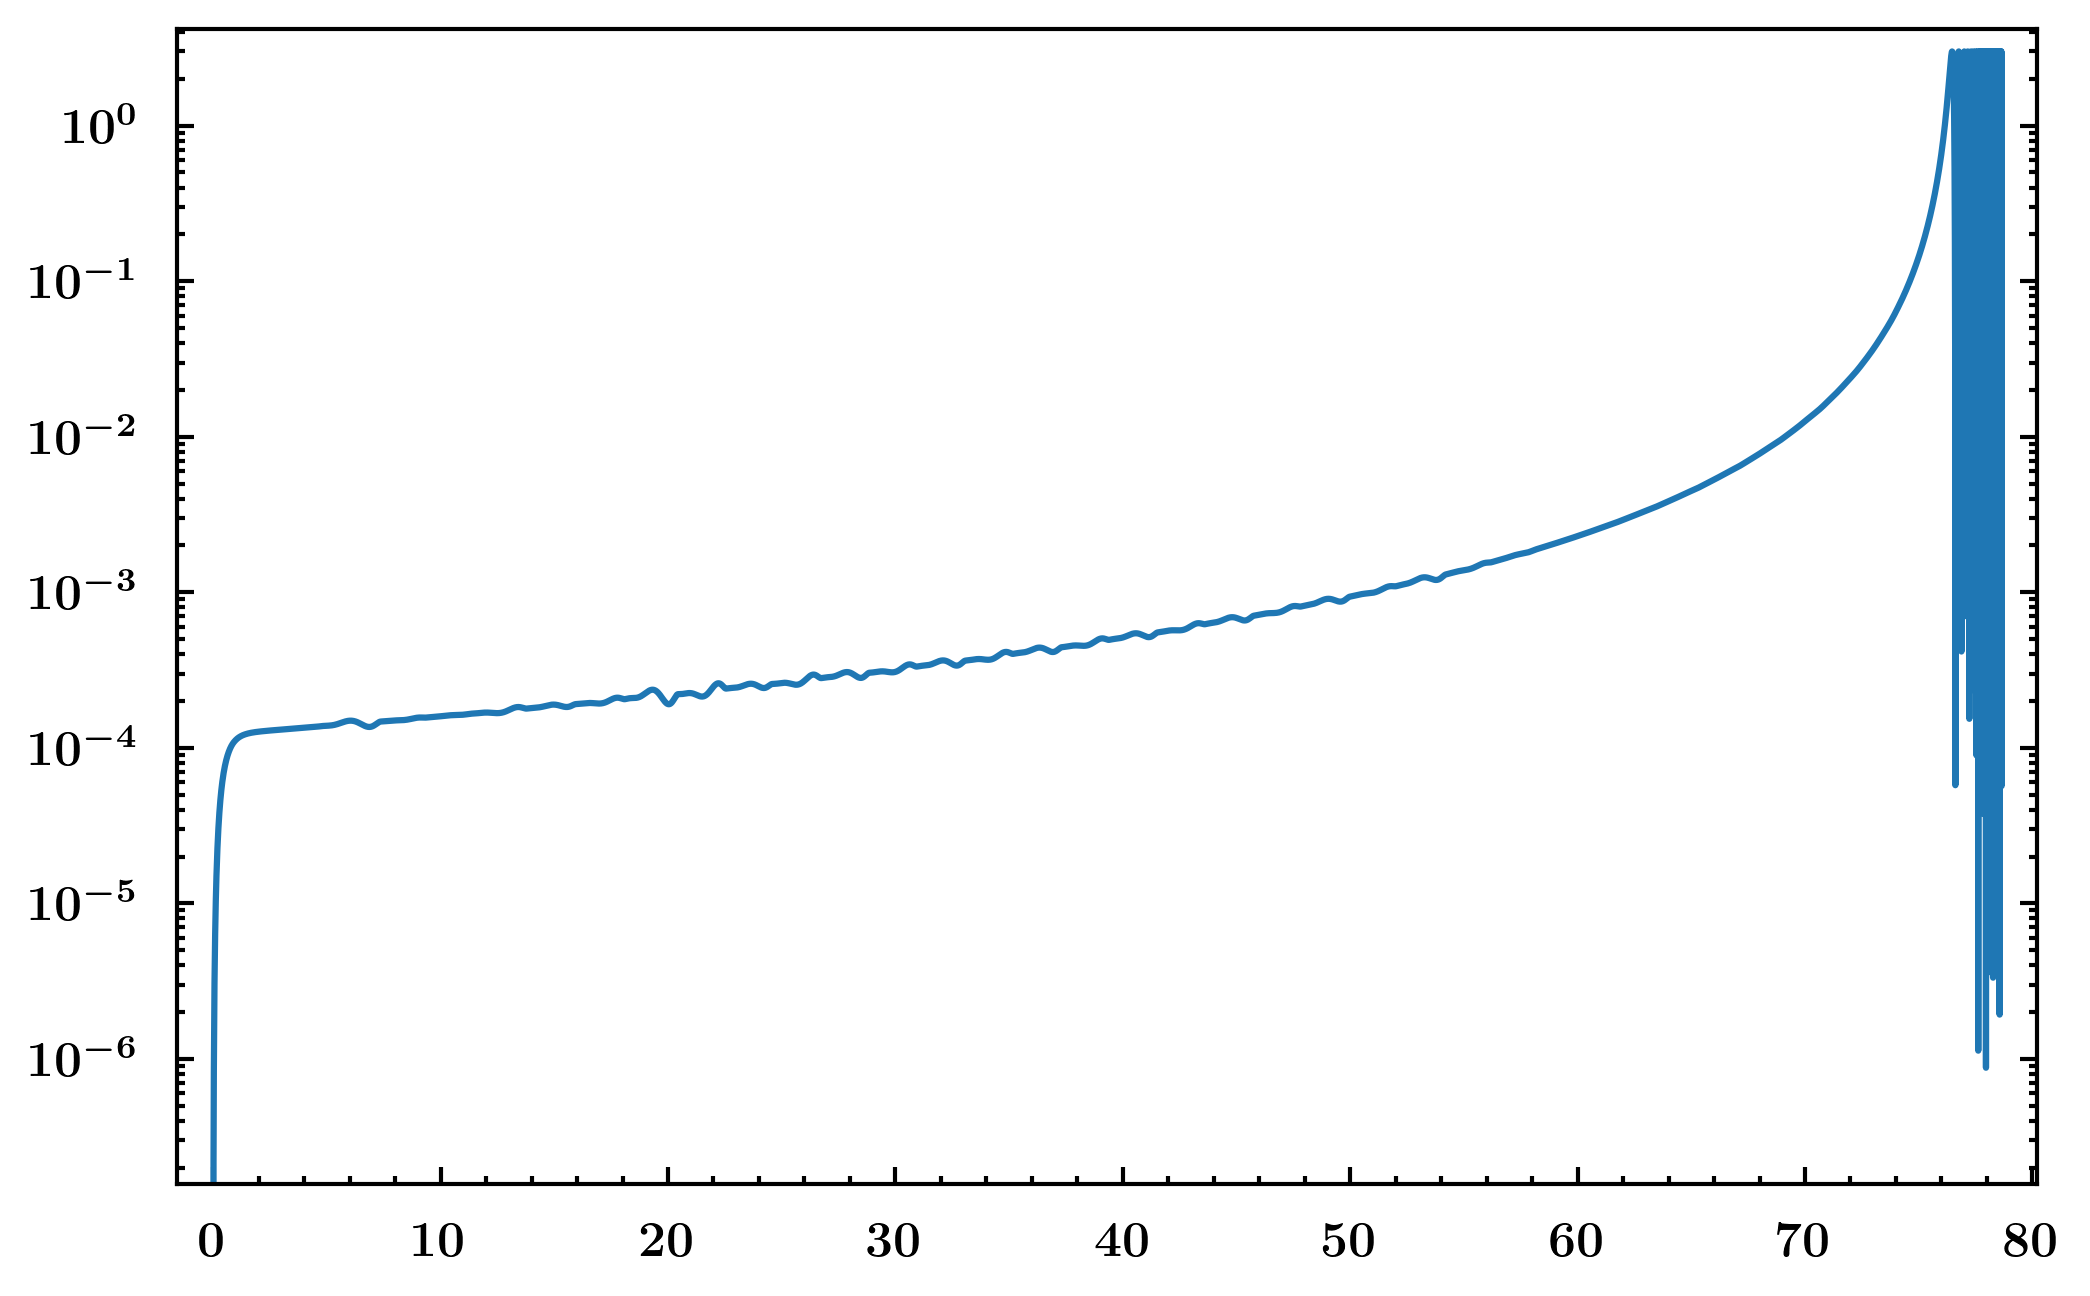

In [8]:
plt.semilogy(N, eps_H)

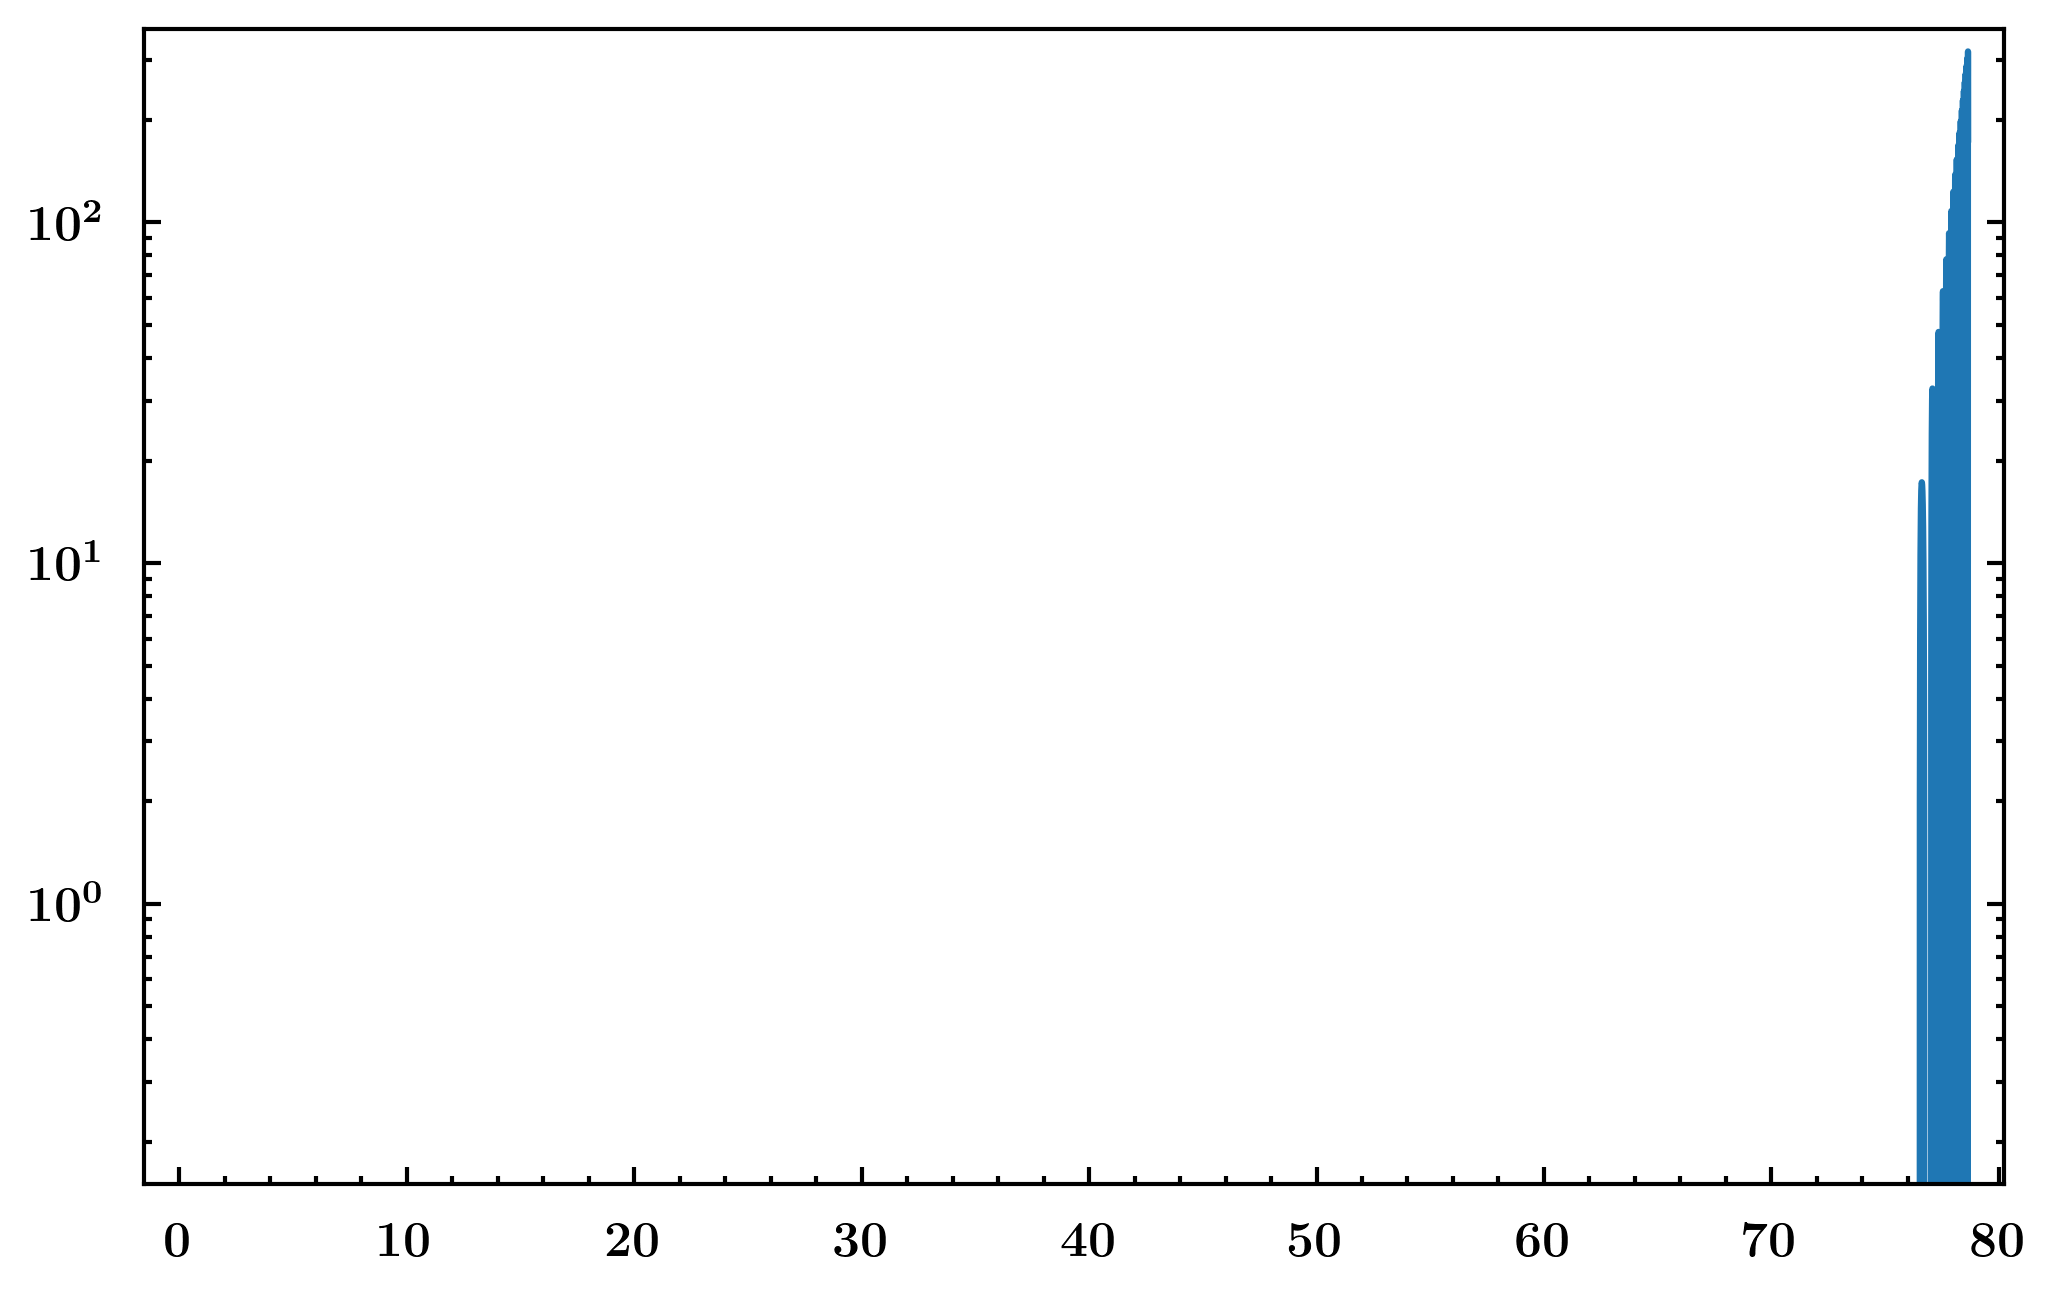

In [9]:
plt.semilogy(N, m_iso/H**2)


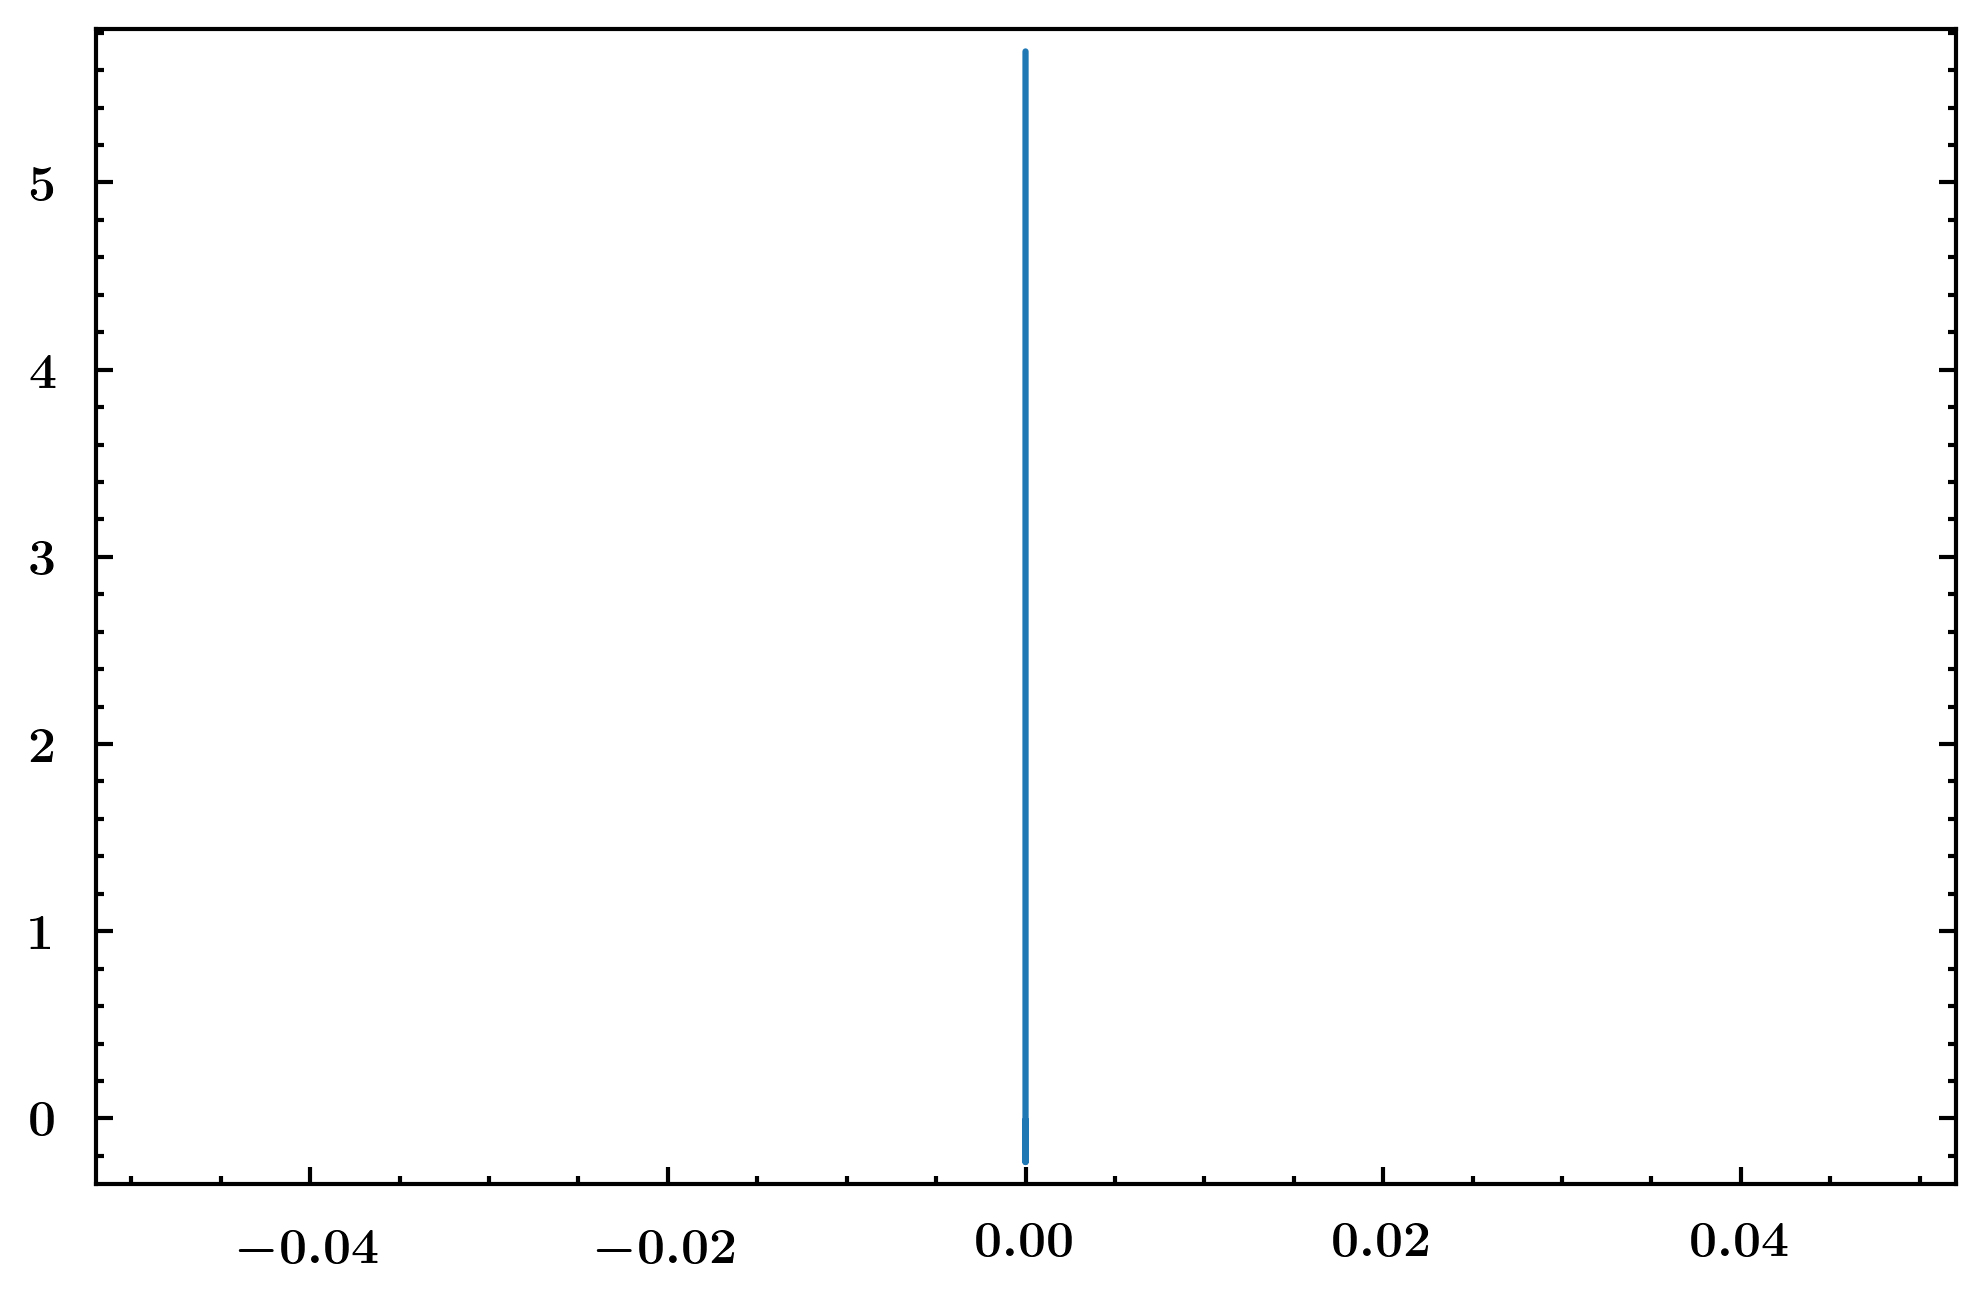

In [10]:
plt.plot(h, phi)